#Forecasting Purchasing Power Parity (PPP) Changes in the Philippine Peso using Linear Regression Algorithm

The dataset that will be used is the "Purchasing Power of Peso", derived from the PSA’s official
website. It contains monthly records of purchasing power parity values from January 1957 to
December 2021. Month-year and Purchasing Power of Peso value composed the dataset. To forecast
the PPP, we will be using the Purchasing Power of Peso as our output feature. As for the input feature,
we will use the Month-year column. Any null values will be removed from the dataset. The data
set will be partitioned into 67-33 ratio for training and testing sets but this will depend on how the
process goes out.

In [4]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


#Install all necessary libraries

In [5]:
import csv
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

#Import the dataset

In [6]:
dataset = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/PPP_dataset - PPP_dataset.csv')
X = dataset.iloc[:, 0].values
y = dataset.iloc[:, 1].values

print(X.shape)
print(y.shape)

(780,)
(780,)


#Describe the dataset

In [ ]:
dataset = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/PPP_dataset - PPP_dataset.csv', delimiter=',')

In [ ]:
print(dataset)

     Date  Purchasing Power of Philippine Peso
0    1957                               101.64
1    1957                               101.64
2    1957                               101.64
3    1957                               101.64
4    1957                               101.64
..    ...                                  ...
775  2021                                 0.77
776  2021                                 0.77
777  2021                                 0.77
778  2021                                 0.77
779  2021                                 0.76

[780 rows x 2 columns]


In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 780 entries, 0 to 779
Data columns (total 2 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Date                                 780 non-null    int64  
 1   Purchasing Power of Philippine Peso  780 non-null    float64
dtypes: float64(1), int64(1)
memory usage: 12.3 KB


In [ ]:
dataset.describe()

,Date,Purchasing Power of Philippine Peso
count,780.000000,780.000000
mean,1989.000000,23.487744
std,18.773701,31.971507
min,1957.000000,0.760000
25%,1973.000000,1.357500
50%,1989.000000,4.555000
75%,2005.000000,39.572500
max,2021.000000,101.640000


#Separate the data into training and testing groups

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

print(X_train.shape)
print(y_train.shape)

(522,)
(522,)


#Create a linear regression model

In [8]:
model = LinearRegression()

#Fit the model to the training data

In [9]:
model.fit(X_train.reshape(-1, 1), y_train)

LinearRegression()

#Predicting the test result

In [10]:
y_pred = model.predict(X_test.reshape(-1, 1))

#Visualizing the training set

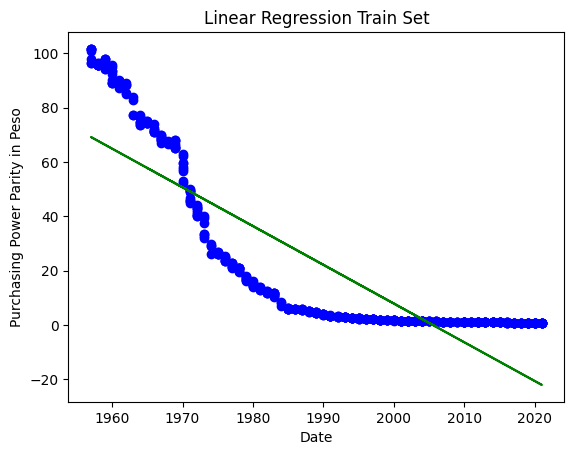

In [11]:
plt.scatter(X_train, y_train, color = 'blue')
plt.plot(X_train, model.predict(X_train.reshape(-1, 1)), color = 'green')
plt.title('Linear Regression Train Set')
plt.xlabel('Date')
plt.ylabel('Purchasing Power Parity in Peso')
plt.show()

The data here in our train set follows a curvature trend.

#Visualizing the test set

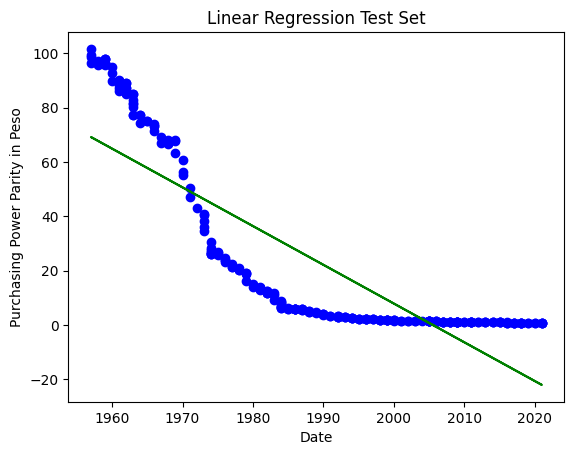

In [12]:
plt.scatter(X_test, y_test, color = 'blue')
plt.plot(X_test, y_pred, color = 'green')
plt.title('Linear Regression Test Set')
plt.xlabel('Date')
plt.ylabel('Purchasing Power Parity in Peso')
plt.show()

Our data also here coming from our test set follows a curvature trend.



#Evaluation

In [13]:
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

Mean Squared Error: 299.52850324675694


An MSE score of 299.53 tells that the dataset considering its values with a maxima of 101 is a bit high for itself. It means that the model may not be fitting well to the data. Future predictions might be far off from the actual values.

In [14]:
r2 = r2_score(y_test, y_pred)
print(f'R^2 Score: {r2}')

R^2 Score: 0.7219472294268698


An  R^2 score of 0.72 tells that 72% of the variance or the variability in the target variable of the dataset which is the PPP value is explained in the model. Considering that the value of 1 is a perfect number of R^2, our score is quite near to this range. This means that our model might not that too bad to fit our dataset as I have stated before in my MSE evaluation.

#Predicting the PPP changes

In [19]:
# Function to predict PPP for a given year and ensure the result is non-negative
def predict_ppp(year):
    year = np.array([[year]])
    prediction = model.predict(year)
    # Ensure that the prediction is non-negative
    return max(prediction[0], 0)

# Example of predicting PPP for a given year
input_year = int(input("Enter a year to predict PPP: "))
predicted_ppp = predict_ppp(input_year)
print(f'The predicted PPP for the year {input_year} is {predicted_ppp:.8f}')


Enter a year to predict PPP: 2000
The predicted PPP for the year 2000 is 7.89370690


This study needs to further add more variables to consider in creating program that will predict the PPP of Philippine Peso. Due to the limited resources available in the PSA government website, we can only manage to experiment our model using the dataset provided there. For clearance, date and peso value is not yet enough to test considering the result of our experiment.